In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv")

C:\Users\Noor com\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 146.9+ MB


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df=df[["iyear",'imonth',"iday",'country','country_txt',"region",'region_txt','city','attacktype1','attacktype1_txt' ,'gname','nkill','nwound','targtype1_txt']]

In [8]:
df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,city,attacktype1,attacktype1_txt,gname,nkill,nwound,targtype1_txt
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,MANO-D,1.0,0.0,Private Citizens & Property
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),23rd of September Communist League,0.0,0.0,Government (Diplomatic)
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,Assassination,Unknown,1.0,0.0,Journalists & Media
3,1970,1,0,78,Greece,8,Western Europe,Athens,3,Bombing/Explosion,Unknown,NaN,NaN,Government (Diplomatic)
4,1970,1,0,101,Japan,4,East Asia,Fukouka,7,Facility/Infrastructure Attack,Unknown,NaN,NaN,Government (Diplomatic)


In [9]:
Year=df["iyear"].value_counts(ascending=False)
Year

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [10]:
print("Most attacks in Year:", Year.index[0])

Most attacks in Year: 2014


In [11]:
Country=df["country_txt"].value_counts()
print("Most attacked Country is :",Country.index[0])

Most attacked Country is : Iraq


In [12]:
Attack=df["attacktype1_txt"].value_counts()
print("Most common attackType is:",Attack.index[0])

Most common attackType is: Bombing/Explosion


In [13]:
df["nkill"].value_counts()

0.0       88149
1.0       36576
2.0       14147
3.0        7738
4.0        4961
          ...  
122.0         1
133.0         1
1383.0        1
134.0         1
953.0         1
Name: nkill, Length: 205, dtype: int64

In [14]:
df["targtype1_txt"].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [15]:
print('Most common Target is:',df["targtype1_txt"].value_counts().index[0])

Most common Target is: Private Citizens & Property


# Visualization:

C:\Users\Noor com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


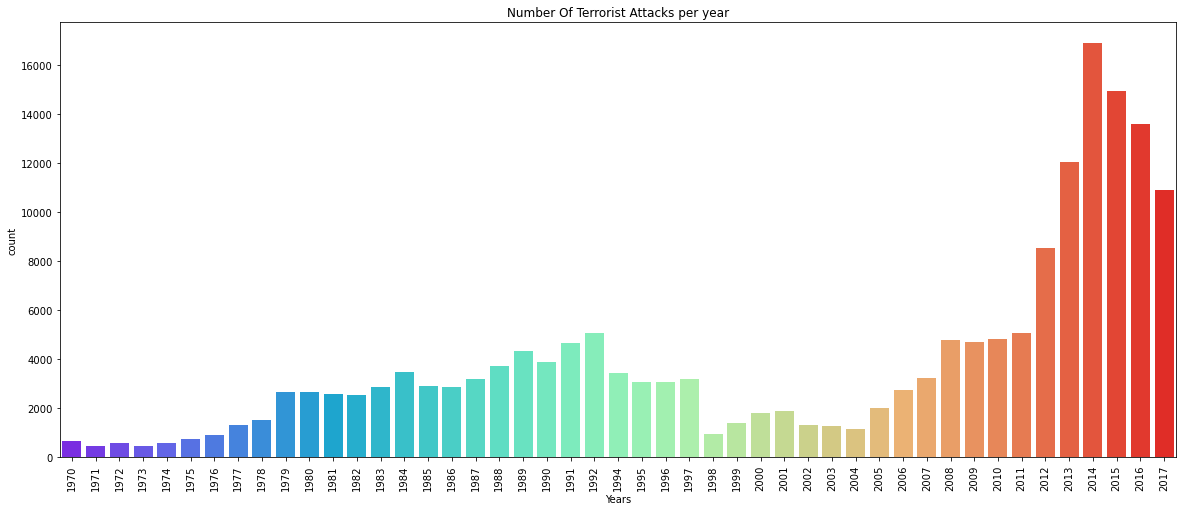

In [16]:
plt.subplots(figsize=(20,8))
sns.countplot('iyear', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Number Of Terrorist Attacks per year')
plt.show()

C:\Users\Noor com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


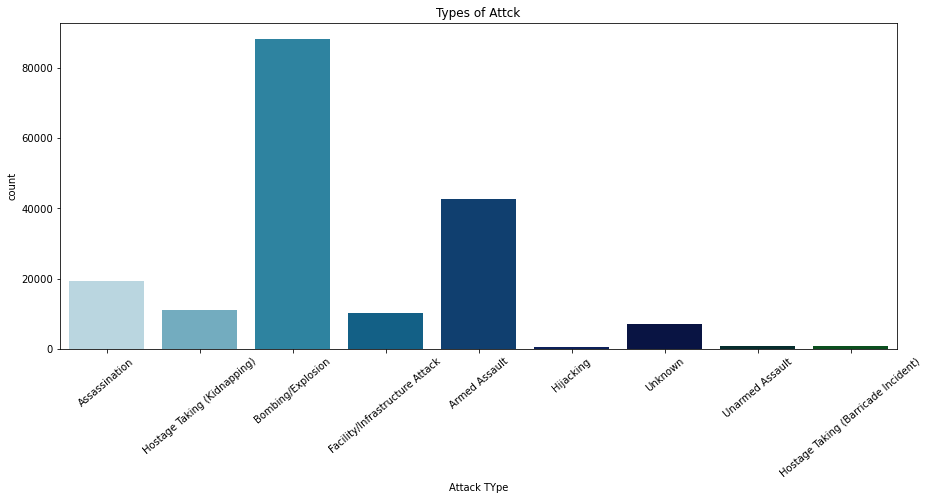

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt', data=df, palette='ocean_r')
plt.xticks(rotation=40)
plt.xlabel('Attack TYpe')
plt.title('Types of Attck')
plt.show()

C:\Users\Noor com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


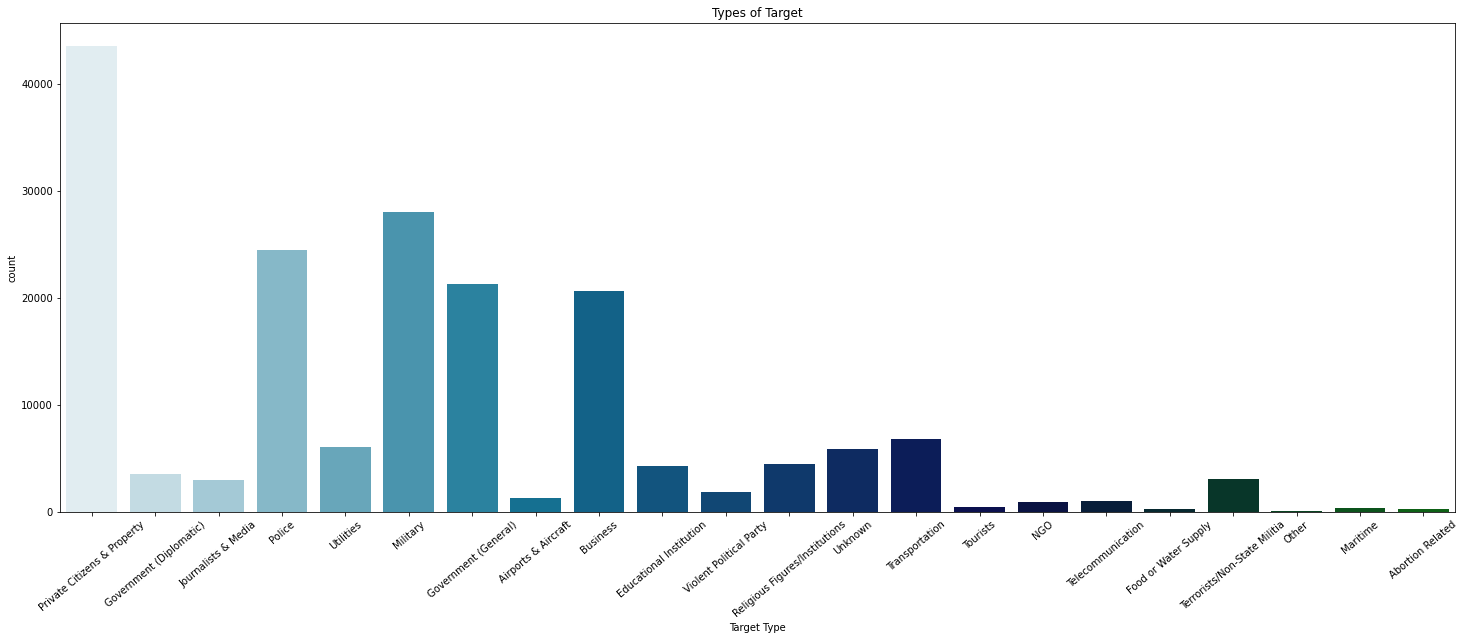

In [18]:
plt.subplots(figsize=(25,9))
sns.countplot("targtype1_txt", data=df, palette='ocean_r')
plt.xticks(rotation=40)
plt.xlabel('Target Type')
plt.title('Types of Target')
plt.show()

C:\Users\Noor com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


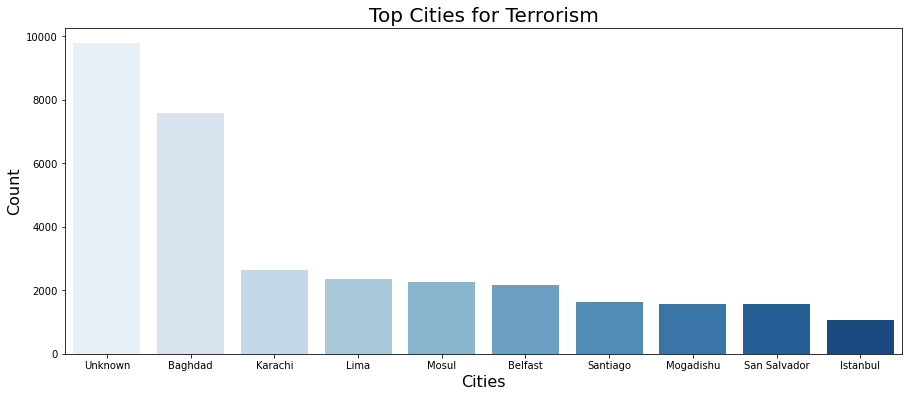

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(df['city'].value_counts()[0:10].index,df['city'].value_counts()[0:10].values, palette="Blues")
plt.title('Top Cities for Terrorism', fontsize=20)
plt.xlabel('Cities',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

C:\Users\Noor com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


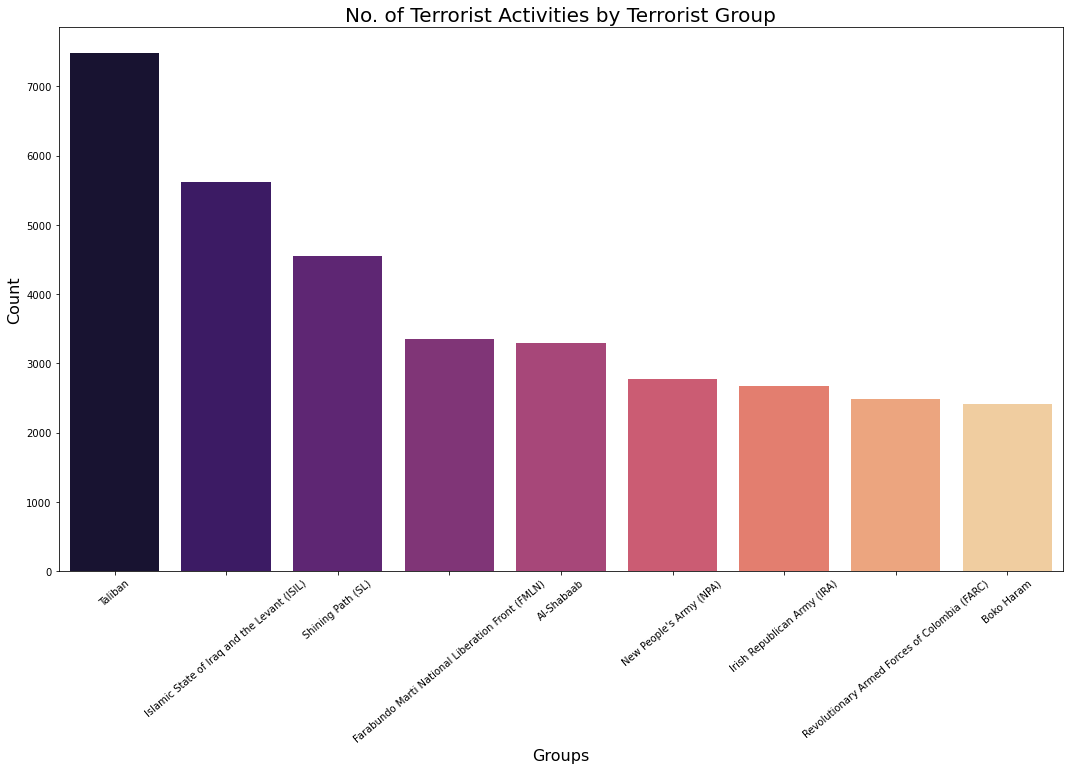

In [20]:
plt.figure(figsize=(18,10))
sns.barplot(df['gname'].value_counts()[1:10].index, df['gname'].value_counts()[1:10].values, palette='magma')
plt.title('No. of Terrorist Activities by Terrorist Group', fontsize=20)
plt.xticks(rotation=40)
plt.xlabel('Groups', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

# Conclusion
Most attacks are happened in Baghdad Iraq of Explosives and Bombs in 2014 by taliban